In [1]:
#q3
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

In [2]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


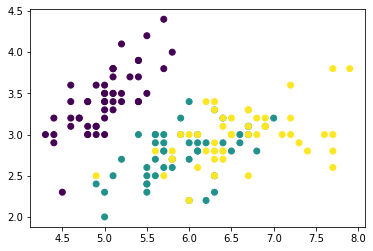

In [4]:
X = iris.data[:,:2] #First two features of iris dataset
Y = iris.target
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

In [5]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, [0,1,2, 3]].values
y = df.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
X_test_2 = X_test[:,:2]
X_train_2 = X_train[:,:2]

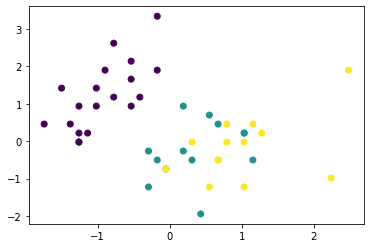

In [8]:
X = X_test[:,:2] #First two features of iris test dataset
Y = y_test
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

In [9]:
len(y_train)

105

ref:
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf = LogisticRegression()

In [12]:
clf.fit(X_train_2, y_train)

LogisticRegression()

In [13]:
y_pred = clf.predict(X_test_2)

In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]


In [15]:
clf.score(X_test_2, y_test)

0.8222222222222222

In [16]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [17]:
#q1
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [18]:
sigmoid(-7.489)

0.0005588893508772334

In [19]:

def Z(x1, x2 ,w1, w2):
    return (w1*x1) +( w2*x2) +1

In [20]:
def y_pred(z):
    return sigmoid(z)

In [21]:
W1 = -0.0459
W2 = 0.977

In [22]:
def det(x1, x2, y):
    z = Z(x1, x2 ,W1, W2)
    y_pred = sigmoid(z)
    dw1 = x1*(y_pred - y)
    dw2 = x2*(y_pred - y)
    return dw1, dw2


In [23]:
def update_w(x11, x12, y1, x21, x22, y2, W1, W2):
    W1 = W1 - 0.005 * ((det(x11, x12, y1)[0] + det(x21, x22, y2)[0])/2) 
    W2 = W2 - 0.005 * ((det(x11, x12, y1)[1] + det(x21, x22, y2)[1])/2) 
    return W1, W2

In [24]:
W1, W2 = update_w(55, 0, 0, 60, 0, 1, W1, W2)
print(W1, W2)

0.05738351511452062 0.977


In [25]:
sigmoid(Z(46, 1, W1, W2))

0.9902108347281808

In [26]:
#q2
X = np.array([2.3, 1.4, 2.6, 3.1, 1.8, 2.8, 5.4, 6.3, 5.8, 6.7, 4.9, 45.2])
Y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

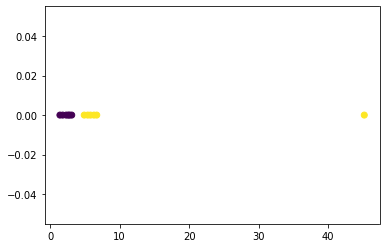

In [43]:
plt.scatter(X, np.zeros_like(X) + 0.,c = Y)
plt.show()

In [37]:
clf = LogisticRegression()
clf.fit(X.reshape((len(X), 1)), Y)


LogisticRegression()

In [55]:
y_pred = clf.predict(X.reshape((len(X), 1)))

In [56]:
clf.score(X.reshape((len(X), 1)), Y)

1.0

In [65]:
len(Y)

12

ref for plot : http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

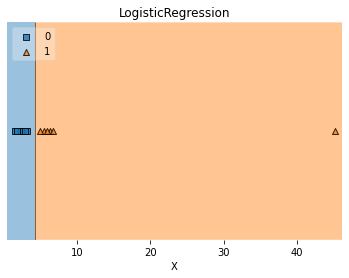

In [76]:
from mlxtend.plotting import plot_decision_regions
# Plotting decision regions
plot_decision_regions(X.reshape((len(X), 1)), Y, clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('X')
plt.title('LogisticRegression')

plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [40]:
reg = LinearRegression().fit(X.reshape((len(X), 1)), Y)

In [41]:
reg.score(X.reshape((len(X), 1)), Y)

0.18945201475354911

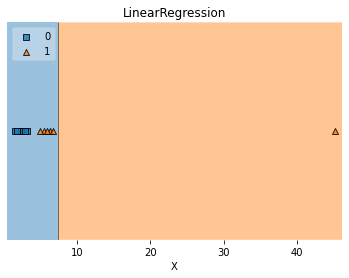

In [77]:
# Plotting decision regions
plot_decision_regions(X.reshape((len(X), 1)), Y, clf=reg, legend=2)

# Adding axes annotations
plt.xlabel('X')
plt.title('LinearRegression')

plt.show()